In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt

In [40]:
#Take problem 3 data set as an example
df = pd.read_excel("Problem 3 data.xlsx", index_col='Month')
df.head()

,Demand
Month,
1,24
2,35
3,40
4,42
5,48


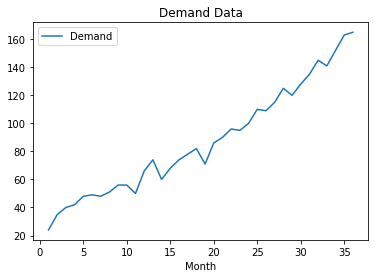

In [34]:
df[['Demand']].plot(title='Demand Data')

C:\Users\user\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\user\Anaconda3.2\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\user\Anaconda3.2\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\user\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\user\Anaconda3.2\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retv

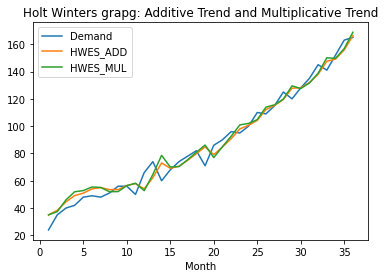

In [36]:
# Double exponential smoothing of demand data ( Additive and multiplicative)
df['HWES_ADD'] = ExponentialSmoothing(df['Demand'],trend='add').fit().fittedvalues
df['HWES_MUL'] = ExponentialSmoothing(df['Demand'],trend='mul').fit().fittedvalues
df[['Demand','HWES_ADD','HWES_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')

In [73]:
df.head(3)

,Demand,HWES_ADD,HWES_MUL
Month,,,
1,24,35.000000,35.000000
2,35,38.321330,37.355883
3,40,44.534695,45.966387


In [74]:
#calculate Mean Forecast Error (MFE) 
Error = np.sum(np.subtract(df['Demand'],df['HWES_ADD']))
index = df.index
number_of_month = len(index)
MFE = Error/number_of_month
MFE

-0.5329042251540407

In [71]:
#calculate Mean Percent Error (MPE)
def mpe(demand, forecast): 
    demand, forecast = np.array(df['Demand']), np.array(df['HWES_ADD'])
    return np.mean(((demand - forecast) / demand)/number_of_month) * 100

mpe(demand, forecast)

-0.08210745432141658

In [61]:
#calculate Mean Absolute Deviation (MAD) 
Error = np.sum(np.abs(np.subtract(df['Demand'],df['HWES_ADD'])))
Average = np.sum(df['Demand'])
MAD = Error/Average
MAD

0.05900040282950731

In [76]:
#calculate Mean Absolute Percentage Error (MAPE)
def mape(demand, forecast): 
    demand, forecast = np.array(df['Demand']), np.array(df['HWES_ADD'])
    return np.mean(np.abs((demand - forecast) / demand)/number_of_month) * 100

mape(demand, forecast)

0.22336647897885498